# Proyecto: Clasificación de Imágenes usando ResNet50V2 y k-NN

Este notebook demuestra cómo utilizar un modelo de red neuronal convolucional preentrenado, ResNet50V2, para extraer características de imágenes y luego usar k-Nearest Neighbors (k-NN) para clasificar esas imágenes. El proceso incluye la extracción de características, el entrenamiento de un modelo k-NN, la realización de predicciones, y la evaluación del rendimiento del modelo.

## Importación de Bibliotecas y Configuración Inicial

Primero, importamos las bibliotecas necesarias para la carga del modelo, la manipulación de imágenes, y la visualización de resultados. También se establece el tamaño de las imágenes de entrada y se carga el modelo preentrenado ResNet50V2, que se utilizará para extraer características de las imágenes.


In [1]:
# Importar bibliotecas necesarias
import os
import numpy np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Definir las dimensiones de las imágenes de entrada
img_height, img_width = 224, 224

# Cargar el modelo guardado
# Aquí cargamos el modelo preentrenado ResNet50V2 que hemos guardado previamente. Este modelo será utilizado para extraer características de las imágenes.
model = load_model('resnet50v2_caltech101.h5')
print("Modelo cargado.")

2024-08-12 11:47:44.355103: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-12 11:47:44.355395: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-12 11:47:44.357291: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-12 11:47:44.362254: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-12 11:47:44.371621: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Modelo cargado.


## Función para la Extracción de Características

La función `extract_features` toma la ruta de una imagen como entrada y utiliza el modelo ResNet50V2 para extraer características. Estas características son vectores de alta dimensionalidad que representan las características visuales de la imagen. La función normaliza la imagen, predice las características usando el modelo, y aplana el resultado para obtener un vector de características unidimensional.

In [2]:
def extract_features(image_path, model):
    # Cargar la imagen desde la ruta especificada y redimensionarla al tamaño requerido
    img = image.load_img(image_path, target_size=(img_height, img_width))
    
    # Convertir la imagen a un array numpy
    img_array = image.img_to_array(img)
    
    # Expandir las dimensiones del array para que sea compatible con la entrada del modelo
    img_array = np.expand_dims(img_array, axis=0)
    
    # Normalizar los valores de los píxeles entre 0 y 1
    img_array /= 255.
    
    # Extraer características usando el modelo preentrenado
    features = model.predict(img_array)
    
    # Aplanar las características para obtener un vector unidimensional
    features_flattened = features.flatten()
    
    return features_flattened


## Extracción de Características de Todas las Imágenes

En esta sección, recorremos todas las imágenes en la carpeta principal, extrayendo características de cada una utilizando la función `extract_features`. Almacenamos estas características en una lista y también guardamos las rutas de las imágenes correspondientes. Finalmente, convertimos la lista de características en un array numpy para facilitar su uso en la siguiente etapa.


In [3]:
# Ruta a la carpeta principal que contiene las subcarpetas con las imágenes
main_folder = 'Data/caltech-101'  # Cambia esto por la ruta correcta a tu carpeta principal

# Lista para almacenar las características extraídas de cada imagen
features_list = []
image_paths = []  # Lista para almacenar las rutas de las imágenes

# Recorrer todas las subcarpetas y extraer características de cada imagen
for subdir in os.listdir(main_folder):
    subdir_path = os.path.join(main_folder, subdir)
    
    # Verificar que es una carpeta
    if os.path.isdir(subdir_path):
        # Recorrer todas las imágenes en la subcarpeta
        for img_name in os.listdir(subdir_path):
            img_path = os.path.join(subdir_path, img_name)
            
            # Extraer características de la imagen
            features = extract_features(img_path, model)
            
            # Guardar las características y la ruta de la imagen
            features_list.append(features)
            image_paths.append(img_path)

# Convertir la lista de características en un array numpy para facilitar su uso
features_array = np.vstack(features_list)
print("Extracción de características completada.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━

## Creación del Índice k-NN y Clasificación

Utilizando las características extraídas, entrenamos un modelo k-NN que nos permitirá encontrar las imágenes más similares en función de sus características. k-NN es un algoritmo de aprendizaje supervisado que clasifica una nueva muestra en función de las clases de sus k vecinos más cercanos. Aquí configuramos el modelo para usar la distancia coseno como métrica de similitud.


In [4]:
# Crear un índice k-NN usando las características extraídas
knn = NearestNeighbors(n_neighbors=5, metric='cosine')

# Ajustar el modelo k-NN con las características extraídas
knn.fit(features_array)

print("Modelo k-NN entrenado y listo para hacer predicciones.")


Indexación completada.


## Búsqueda de Imágenes Similares

Esta función permite buscar imágenes similares a una imagen de consulta específica utilizando el modelo k-NN entrenado. El proceso consiste en extraer las características de la imagen de consulta y luego encontrar las imágenes más cercanas en el conjunto de datos utilizando k-NN. La función devuelve los índices de las imágenes más similares.


In [5]:
def search_similar_images(query_image_path, model, knn):
    # Extraer características de la imagen de consulta usando el modelo preentrenado
    query_features = extract_features(query_image_path, model)
    
    # Utilizar k-NN para encontrar las imágenes más cercanas basadas en las características extraídas
    # 'kneighbors' retorna las distancias y los índices de las imágenes más cercanas en el conjunto de datos
    distances, indices = knn.kneighbors([query_features])
    
    # Retornar los índices de las imágenes más similares
    return indices

## Ejemplo de Uso: Búsqueda y Visualización de Imágenes Similares

En esta sección, se utiliza la función `search_similar_images` para buscar imágenes similares a una imagen de consulta específica. Luego, las imágenes similares se muestran visualmente, permitiendo evaluar la calidad de la búsqueda.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


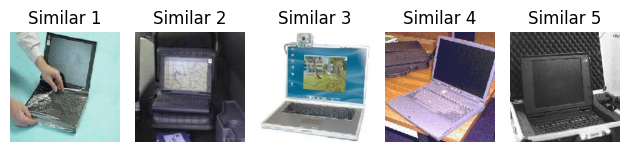

In [48]:
# Ejemplo de uso con una imagen de consulta

# Especificar la ruta de la imagen de consulta
query_image_path = 'pruebas/teclado.jpeg'  # Cambia esto por la ruta a tu imagen de consulta

# Buscar imágenes similares utilizando la función 'search_similar_images'
similar_images_indices = search_similar_images(query_image_path, model, knn)

# Recorrer los índices de las imágenes similares y mostrarlas
for i, index in enumerate(similar_images_indices[0]):  # 'similar_images_indices[0]' contiene los índices de las imágenes similares
    # Obtener la ruta de la imagen similar usando el índice correspondiente
    img_path = image_paths[index]
    
    # Cargar la imagen similar desde su ruta
    img = image.load_img(img_path, target_size=(img_height, img_width))
    
    # Mostrar la imagen en una cuadrícula
    plt.subplot(1, 5, i + 1)  # Crear una cuadrícula de 1 fila y 5 columnas (modifica el 5 según cuántas imágenes quieras mostrar)
    plt.imshow(img)  # Mostrar la imagen
    plt.title(f"Similar {i+1}")  # Título indicando la posición en la lista de similitud
    plt.axis('off')  # Ocultar los ejes para una mejor visualización

# Ajustar el diseño para evitar superposición entre imágenes
plt.tight_layout()

# Mostrar todas las imágenes similares encontradas
plt.show()

## Evaluación del Modelo: Precisión, Reporte de Clasificación y Matriz de Confusión

En esta sección, evaluamos el rendimiento del sistema de clasificación utilizando varias métricas clave. Calculamos la precisión general, generamos un reporte de clasificación detallado que incluye precisión, recall y F1-score por clase, y mostramos la matriz de confusión para visualizar las predicciones correctas e incorrectas. Finalmente, graficamos estas métricas para un análisis visual más intuitivo.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━

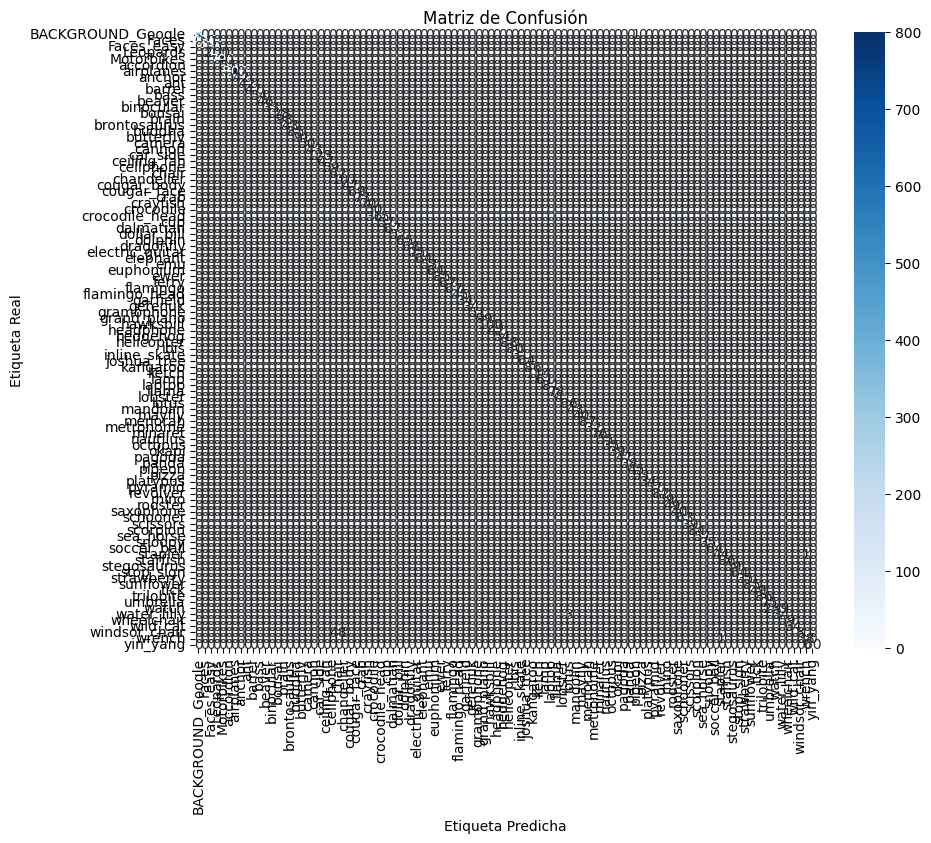

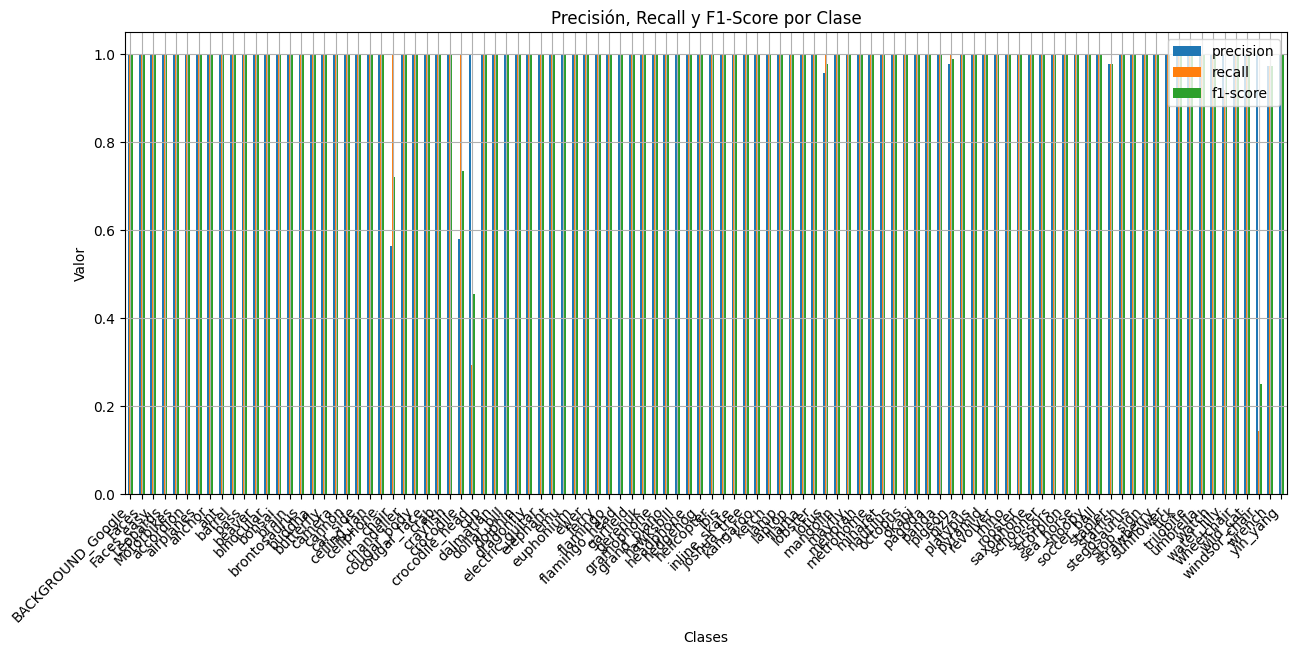

In [50]:
# Importar las bibliotecas necesarias para la evaluación
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Obtener las etiquetas reales y predichas

# Inicializamos listas para almacenar las clases verdaderas (reales) y las clases predichas
true_classes = []
predicted_classes = []

# Recorrer todas las imágenes del conjunto de validación o prueba
# 'image_paths' debería contener las rutas a las imágenes del conjunto de validación o prueba
for img_path in image_paths:
    # Obtener la clase real desde la ruta de la imagen
    true_class = os.path.basename(os.path.dirname(img_path))
    true_classes.append(true_class)
    
    # Predecir la clase de la imagen
    features = extract_features(img_path, model)  # Extraer las características de la imagen
    distances, indices = knn.kneighbors([features])  # Encontrar las imágenes más cercanas usando k-NN
    pred_class = os.path.basename(os.path.dirname(image_paths[indices[0][0]]))  # Clase de la imagen más cercana
    predicted_classes.append(pred_class)

# Calcular la precisión general del sistema

# 'accuracy_score' compara las clases verdaderas con las predichas y calcula la proporción de predicciones correctas
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Precisión del sistema: {accuracy:.2f}")

# Mostrar el reporte de clasificación

# 'classification_report' genera un reporte detallado que incluye precisión, recall, y F1-score para cada clase
# 'output_dict=True' retorna el reporte como un diccionario para facilitar su manejo posterior
print("Reporte de clasificación:")
report = classification_report(true_classes, predicted_classes, output_dict=True)
print(report)

# Mostrar la matriz de confusión

# 'confusion_matrix' crea una matriz donde las filas representan las clases verdaderas y las columnas las predichas
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Matriz de confusión:")
print(conf_matrix)

# Convertir el reporte de clasificación a un DataFrame para fácil manejo

# Convertimos el reporte a un DataFrame de pandas para facilitar la manipulación y graficado
report_df = pd.DataFrame(report).transpose()

# Graficar la matriz de confusión

# Usamos seaborn para crear un heatmap que visualiza la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(true_classes), yticklabels=np.unique(true_classes))
plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.show()

# Graficar la precisión, recall y F1-score por clase

# Eliminamos las últimas tres filas del DataFrame que no corresponden a clases ('accuracy', 'macro avg', 'weighted avg')
report_df = report_df[:-3]

# Graficamos las métricas de precisión, recall, y F1-score para cada clase
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(15, 6))
plt.title('Precisión, Recall y F1-Score por Clase')
plt.xlabel('Clases')
plt.ylabel('Valor')
plt.xticks(rotation=45, ha='right')  # Rotamos las etiquetas de las clases para que sean legibles
plt.grid(True)
plt.show()


## Probar Diferentes Valores de n_neighbors

En esta sección, exploramos el impacto de diferentes valores de `n_neighbors` en el rendimiento del modelo k-NN. La métrica que utilizamos para medir el rendimiento es la precisión del modelo. Al variar el número de vecinos considerados (`n_neighbors`), podemos identificar el valor óptimo que maximiza la precisión de las predicciones.


In [51]:
# Probar diferentes valores de n_neighbors

# Recorremos una lista de diferentes valores de 'n_neighbors' para evaluar su impacto en la precisión del modelo
for n in [3, 5, 7]:
    # Inicializar un nuevo modelo k-NN con el valor actual de 'n_neighbors' y la métrica de distancia coseno
    knn = NearestNeighbors(n_neighbors=n, metric='cosine')
    
    # Ajustar el modelo k-NN con las características extraídas del conjunto de datos
    knn.fit(features_array)
    
    # Inicializar una lista para almacenar las clases predichas con el valor actual de 'n_neighbors'
    predicted_classes = []
    
    # Recorrer todas las imágenes en 'image_paths' para realizar las predicciones
    for img_path in image_paths:
        # Extraer las características de la imagen actual usando el modelo preentrenado
        features = extract_features(img_path, model)
        
        # Utilizar k-NN para encontrar las imágenes más cercanas basadas en las características extraídas
        distances, indices = knn.kneighbors([features])
        
        # Obtener la clase de la imagen más cercana y añadirla a la lista de predicciones
        pred_class = os.path.basename(os.path.dirname(image_paths[indices[0][0]]))
        predicted_classes.append(pred_class)
    
    # Calcular la precisión del modelo con el valor actual de 'n_neighbors'
    accuracy = accuracy_score(true_classes, predicted_classes)
    
    # Imprimir la precisión obtenida con el valor actual de 'n_neighbors'
    print(f"Precisión con n_neighbors={n}: {accuracy:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━

1




2



3



4



5






## Cálculo Manual de Métricas de Evaluación: Precisión, Recall y F1-Score

En esta sección, realizamos un cálculo manual de las métricas de evaluación clave, como precisión, recall y F1-score, para cada clase en el conjunto de validación o prueba. Estas métricas nos permiten entender mejor el rendimiento del modelo en diferentes clases, especialmente cuando estamos interesados en ver cómo se comporta el modelo sin depender directamente de bibliotecas como `scikit-learn`.


In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Inicializar listas para almacenar las etiquetas reales y predichas manualmente
true_labels_manual = []
predicted_labels_manual = []

# Recorrer todas las imágenes del conjunto de validación o prueba
# 'image_paths' debería contener las rutas a las imágenes del conjunto de validación o prueba
for img_path in image_paths:
    # Obtener la clase real desde la ruta de la imagen
    true_label = os.path.basename(os.path.dirname(img_path))
    true_labels_manual.append(true_label)
    
    # Predecir la clase de la imagen utilizando k-NN
    features = extract_features(img_path, model)  # Extraer las características de la imagen
    distances, indices = knn.kneighbors([features])  # Encontrar las imágenes más cercanas
    pred_label = os.path.basename(os.path.dirname(image_paths[indices[0][0]]))  # Clase de la imagen más cercana
    predicted_labels_manual.append(pred_label)

# Calcular la matriz de confusión manualmente

# Determinar el número de clases presentes en el conjunto de datos
num_classes = len(np.unique(true_labels_manual))

# Inicializar una matriz de confusión con ceros, de tamaño (número de clases) x (número de clases)
conf_matrix_manual = np.zeros((num_classes, num_classes), dtype=int)

# Crear un diccionario que mapea cada clase a un índice
class_indices = {label: index for index, label in enumerate(np.unique(true_labels_manual))}

# Rellenar la matriz de confusión manualmente
for true, pred in zip(true_labels_manual, predicted_labels_manual):
    conf_matrix_manual[class_indices[true], class_indices[pred]] += 1

# Inicializar listas para almacenar las métricas por clase
precisions_manual = []
recalls_manual = []
f1_scores_manual = []

# Calcular las métricas manualmente para cada clase

for i in range(num_classes):
    tp = conf_matrix_manual[i, i]  # Verdaderos positivos (diagonal principal de la matriz de confusión)
    fp = conf_matrix_manual[:, i].sum() - tp  # Falsos positivos (suma de la columna menos los verdaderos positivos)
    fn = conf_matrix_manual[i, :].sum() - tp  # Falsos negativos (suma de la fila menos los verdaderos positivos)
    
    # Calcular precisión, recall y F1-score
    precision_manual = tp / (tp + fp) if (tp + fp) > 0 else 0  # Evitar división por cero
    recall_manual = tp / (tp + fn) if (tp + fn) > 0 else 0  # Evitar división por cero
    f1_score_manual = 2 * (precision_manual * recall_manual) / (precision_manual + recall_manual) if (precision_manual + recall_manual) > 0 else 0
    
    precisions_manual.append(precision_manual)
    recalls_manual.append(recall_manual)
    f1_scores_manual.append(f1_score_manual)

# Imprimir las métricas calculadas manualmente

# 'classes_manual' contiene las clases únicas presentes en el conjunto de validación o prueba
classes_manual = np.unique(true_labels_manual)

# Imprimir precisión, recall y F1-score para cada clase
for i, class_name in enumerate(classes_manual):
    print(f"Clase: {class_name}")
    print(f"  Precisión: {precisions_manual[i]:.2f}")
    print(f"  Recall: {recalls_manual[i]:.2f}")
    print(f"  F1-Score: {f1_scores_manual[i]:.2f}")
    print()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━

## Graficar Métricas de Evaluación Calculadas Manualmente

Después de calcular las métricas de precisión, recall y F1-Score para cada clase manualmente, utilizamos un DataFrame de pandas para organizar estos datos y luego los graficamos. Esto nos permite visualizar el rendimiento del modelo de una manera clara y comprensible.


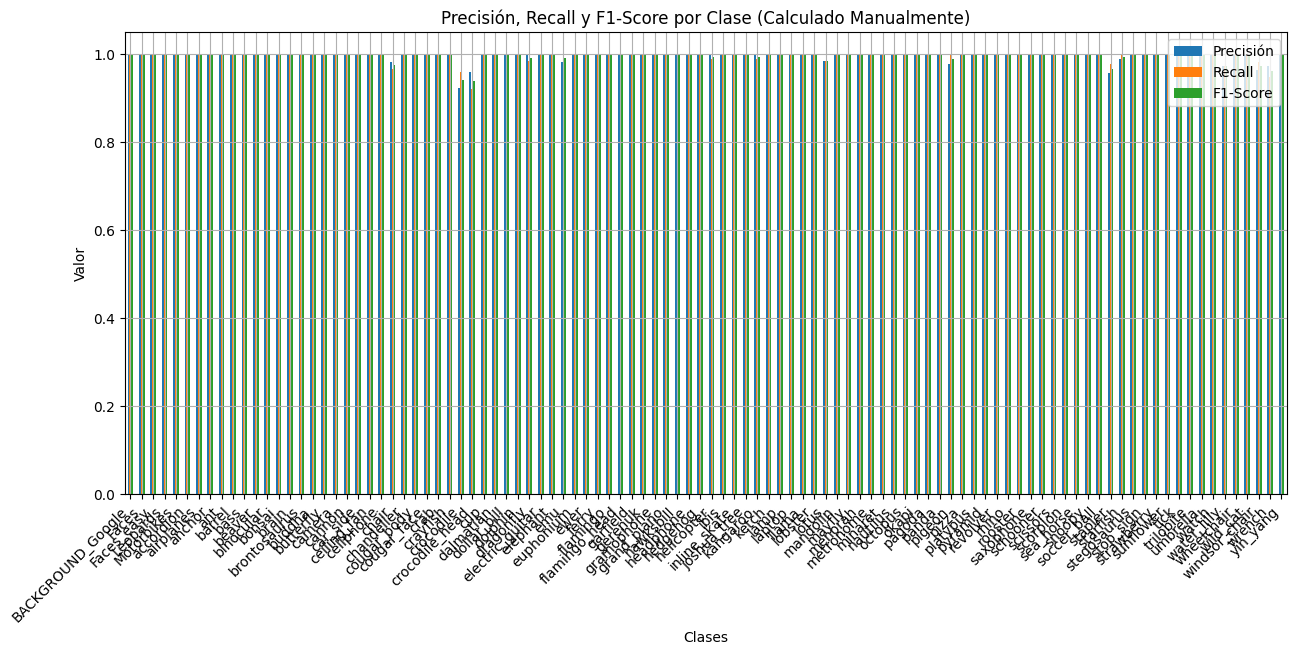

In [53]:
# Crear un DataFrame para graficar las métricas

import pandas as pd

# Crear un DataFrame con las métricas calculadas manualmente
# Las columnas incluyen la clase, la precisión, el recall, y el F1-Score para cada clase
metrics_manual_df = pd.DataFrame({
    'Clase': classes_manual,  # Nombres de las clases
    'Precisión': precisions_manual,  # Precisión calculada manualmente para cada clase
    'Recall': recalls_manual,  # Recall calculado manualmente para cada clase
    'F1-Score': f1_scores_manual  # F1-Score calculado manualmente para cada clase
})

# Graficar las métricas

# Configuramos el DataFrame para que la columna 'Clase' sea el índice, lo que facilita la creación del gráfico
metrics_manual_df.set_index('Clase').plot(kind='bar', figsize=(15, 6))  # Crear un gráfico de barras para las métricas

# Añadir un título al gráfico
plt.title('Precisión, Recall y F1-Score por Clase (Calculado Manualmente)')

# Etiquetar los ejes
plt.xlabel('Clases')
plt.ylabel('Valor')

# Rotar las etiquetas de las clases para que sean legibles
plt.xticks(rotation=45, ha='right')

# Añadir una cuadrícula para mejorar la legibilidad del gráfico
plt.grid(True)

# Mostrar el gráfico
plt.show()